<a href="https://www.kaggle.com/code/emreustundag/pytorch-tutorial?scriptVersionId=112035060" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## PyTorch Intro For Beginners

PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library. Torch is an open source ML library used for creating deep neural networks and is written in the Lua scripting language. It's one of the preferred platforms for deep learning research.

* [PyTorch Basics](#1)
* [Linear Regression](#2)
* [Logistic Regression](#3)
* [Artificial Neural Networks (ANNs)](#4)
* [Convolutional Neural Networks (CNNs)](#5)
* [Recurrent Neural Networks (RNNs)](#6)
* [Long Short Term Memory (LSTM)](#7)
* [Using GPU on PyTorch](#8)
* [Result](#9)

<a id = "1"></a>
### PyTorch Basics

In [6]:
# pytorch arrays
import torch
array = [[4,3,3],[1,2,5]]
tensor = torch.Tensor(array)
print("Array shape: ",tensor.shape)
print("Array type: ",tensor.type)
print(tensor)

Array shape:  torch.Size([2, 3])
Array type:  <built-in method type of Tensor object at 0x7fed6a77a8f0>
tensor([[4., 3., 3.],
        [1., 2., 5.]])


In [7]:
# pytorch ones
print(torch.ones((3,4)))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [8]:
# pytorch random
print(torch.rand((3,4)))

tensor([[0.8594, 0.9070, 0.3209, 0.9001],
        [0.6931, 0.2818, 0.6304, 0.3183],
        [0.1527, 0.5097, 0.7127, 0.6219]])


In [9]:
# random numpy array
import numpy as np
array = np.random.rand(2,2)
print("{} \n{}".format(type(array), array))

# from numpy to torch tensor
torch_tensor = torch.from_numpy(array)
print("{}\n".format(torch_tensor))

# tensor to numpy
array = torch_tensor.numpy()
print("{}\n".format(array))

<class 'numpy.ndarray'> 
[[0.53883375 0.20297587]
 [0.74043753 0.72658612]]
tensor([[0.5388, 0.2030],
        [0.7404, 0.7266]], dtype=torch.float64)

[[0.53883375 0.20297587]
 [0.74043753 0.72658612]]



##### Basic Mathematical Operations

In [10]:
# create tensor
tensor = torch.ones((3,3))
print(tensor)

# resize
print(tensor.view(tensor.shape[0] * tensor.shape[1]))

# add
print("Addition: {}\n".format(torch.add(tensor, tensor)))

# subtraction
print("Subtraction: {}\n".format(torch.sub(tensor, tensor)))

# element-wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor, tensor)))

# element-wise division
print("Element wise division: {}\n".format(torch.div(tensor, tensor)))

# Mean
tensor = torch.Tensor([213,45,34,567,88,67])
print("Mean: {}\n".format(tensor.mean()))

# Standard deviation
print("Standard deviation: {}\n".format(tensor.std()))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])
Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 169.0

Standard deviation: 205.380615234375



##### Variables

The difference between variables and tensors is the variables accumulate gradients. For backpropagation we need variables..

In [11]:
# import variables from pytorch lib
from torch.autograd import Variable
# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [12]:
# basic backpropagation
# lets assume we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print("y = ",y)

# recap o equation o = 1/2*sum(y)
o = 1/2*sum(y)
print("o = ",o)

# backward
o.backward()

# gradients
x.grad

y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)
o =  tensor(10., grad_fn=<MulBackward0>)


tensor([2., 4.])

<a id = "2"></a>
### Linear Regression

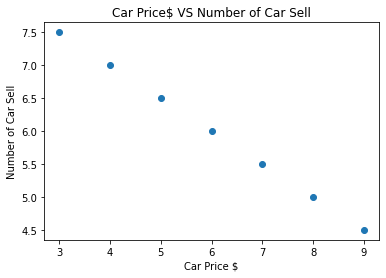

In [13]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [14]:
# libraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

epoch: 0, loss: 63.848854064941406
epoch: 50, loss: 4.4021382331848145
epoch: 100, loss: 2.974709987640381
epoch: 150, loss: 2.0101349353790283
epoch: 200, loss: 1.358332872390747
epoch: 250, loss: 0.917881965637207
epoch: 300, loss: 0.6202512383460999
epoch: 350, loss: 0.4191303849220276
epoch: 400, loss: 0.2832243740558624
epoch: 450, loss: 0.19138666987419128
epoch: 500, loss: 0.12932820618152618
epoch: 550, loss: 0.08739213645458221
epoch: 600, loss: 0.059054844081401825
epoch: 650, loss: 0.03990599140524864
epoch: 700, loss: 0.02696589007973671
epoch: 750, loss: 0.018221765756607056
epoch: 800, loss: 0.0123131750151515
epoch: 850, loss: 0.00832042470574379
epoch: 900, loss: 0.005622416269034147
epoch: 950, loss: 0.003799265017732978
epoch: 1000, loss: 0.0025672868359833956


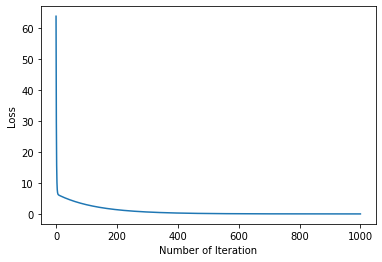

In [15]:
# create Linear Regression class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        # accessing all things inherited from nn.Module
        super(LinearRegression,self).__init__()
        # linear function from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# Optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    # optimization
    optimizer.zero_grad()
    
    # forward to get output
    results = model(car_price_tensor)
    
    # calculate loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss for each 50 iterations
    if(iteration % 50 == 0):
        print("epoch: {}, loss: {}".format(iteration, loss.data))
        
plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.show()

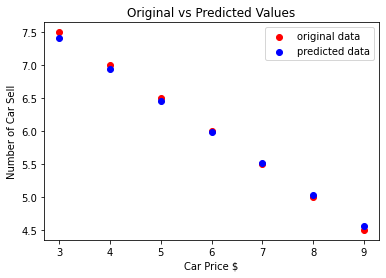

In [16]:
# predicted car prices
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = "original data", color = "red")
plt.scatter(car_prices_array, predicted, label = "predicted data", color = "blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted Values")
plt.show()

<a id = "3"></a>
### Logistic Regression

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit. The Hosmer–Lemeshow test is a popular method to assess model fit.

Source: [https://www.ibm.com/topics/logistic-regression]

In [17]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [18]:
# Prepare dataset
# load data
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv", dtype = np.float32)

# split data into features (pixels) and labels (numbers from 0 to 9)
target = train_df.label.values

# normalization of pixels
features = train_df.loc[:,train_df.columns != "label"].values/255

# train-test split. train data: 80% and test data: 20
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# create tensors for train set
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create tensors for test set
x_test = torch.from_numpy(x_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(x_train) / batch_size)
num_epochs = int(num_epochs)

# pytorch train and test sets
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

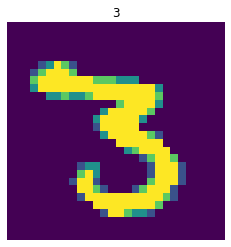

In [19]:
# visualize one of the image
plt.imshow(features[13].reshape(28,28))
plt.axis("off")
plt.title(str(int(target[13])))
plt.savefig("graph.png")
plt.show()

In [20]:
# create logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
# Instantiate model class
input_dim = 28 * 28  # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create model
model = LogisticRegressionModel(input_dim, output_dim)

# cross entropy loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [21]:
# training model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # calculate gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        # prediction
        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            # predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                # forward propagation
                outputs = model(test)
                
                # get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # total number of labels
                total += len(labels)
                
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # print loss
            print("Iteration: {} Loss: {} Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.8120356798171997 Accuracy: 67.0%
Iteration: 1000 Loss: 1.5937587022781372 Accuracy: 75.75%
Iteration: 1500 Loss: 1.2855148315429688 Accuracy: 78.51190185546875%
Iteration: 2000 Loss: 1.2001194953918457 Accuracy: 80.08333587646484%
Iteration: 2500 Loss: 1.0336549282073975 Accuracy: 81.04762268066406%
Iteration: 3000 Loss: 0.9306798577308655 Accuracy: 81.92857360839844%
Iteration: 3500 Loss: 0.8990523815155029 Accuracy: 82.54762268066406%
Iteration: 4000 Loss: 0.755150556564331 Accuracy: 83.02381134033203%
Iteration: 4500 Loss: 0.9619503021240234 Accuracy: 83.27381134033203%
Iteration: 5000 Loss: 0.7984424829483032 Accuracy: 83.76190185546875%
Iteration: 5500 Loss: 0.7508348822593689 Accuracy: 84.05952453613281%
Iteration: 6000 Loss: 0.8609666228294373 Accuracy: 84.45237731933594%
Iteration: 6500 Loss: 0.6560181975364685 Accuracy: 84.67857360839844%
Iteration: 7000 Loss: 0.7172775864601135 Accuracy: 84.94047546386719%
Iteration: 7500 Loss: 0.6343325972557068 Accura

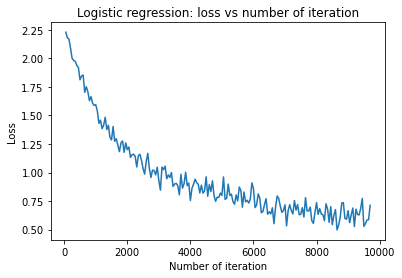

In [22]:
# evaluation
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic regression: loss vs number of iteration")
plt.show()

<a id = "4"></a>
### Artificial Neural Networks

Neural networks reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of AI, machine learning, and deep learning.

<img src="https://static.javatpoint.com/tutorial/artificial-neural-network/images/artificial-neural-network4.png">

*Input Layer:*

As the name suggests, it accepts inputs in several different formats provided by the programmer.

*Hidden Layer:*

The hidden layer presents in-between input and output layers. It performs all the calculations to find hidden features and patterns.

*Output Layer:*

The input goes through a series of transformations using the hidden layer, which finally results in output that is conveyed using this layer.

In [23]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [24]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [25]:
# instantiate ANN
input_dim = 28*28
hidden_dim = 150
outout_dim = 10

# create ann model
model = ANNModel(input_dim, hidden_dim, output_dim)

# cross-entropy loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [26]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7938473224639893  Accuracy: 77.89286041259766 %
Iteration: 1000  Loss: 0.4730690121650696  Accuracy: 87.60713958740234 %
Iteration: 1500  Loss: 0.2254520058631897  Accuracy: 89.5952377319336 %
Iteration: 2000  Loss: 0.30916550755500793  Accuracy: 90.63095092773438 %
Iteration: 2500  Loss: 0.31231215596199036  Accuracy: 91.89286041259766 %
Iteration: 3000  Loss: 0.12409105896949768  Accuracy: 92.79762268066406 %
Iteration: 3500  Loss: 0.24699987471103668  Accuracy: 93.46428680419922 %
Iteration: 4000  Loss: 0.059155117720365524  Accuracy: 94.04762268066406 %
Iteration: 4500  Loss: 0.31447190046310425  Accuracy: 94.53571319580078 %
Iteration: 5000  Loss: 0.09311271458864212  Accuracy: 94.85713958740234 %
Iteration: 5500  Loss: 0.18180543184280396  Accuracy: 94.98809814453125 %
Iteration: 6000  Loss: 0.19119735062122345  Accuracy: 95.3452377319336 %
Iteration: 6500  Loss: 0.09642787277698517  Accuracy: 95.60713958740234 %
Iteration: 7000  Loss: 0.10090424865484238 

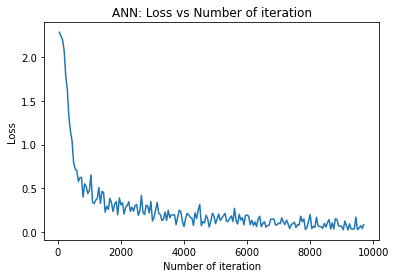

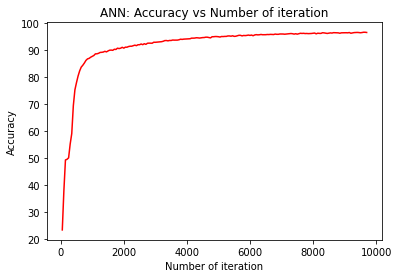

In [27]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

<a id = "5"></a>
### Convolutional Neural Networks

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery. CNNs are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps. (Wikipedia)

A Convolutional Neural Network is made up of three main layers:

* The Convolutional Layers
* The Pooling Layers
* The Fully Connected Layers

The following architecture shows how input is passed into the three layers of the Convolutional Neural Network:

<img src="https://www.theclickreader.com/wp-content/uploads/2020/07/cnn-architecture-1536x864.png" height = "500" width = "800">

Source: [https://www.theclickreader.com/building-a-convolutional-neural-network/]

In [28]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [29]:
# Create CNN model class
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride = 1, padding = 0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, stride = 1, padding = 0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10)
        
    def forward(self, x):
        # Coonvolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)
        
        # Linear function (readout)
        out = self.fc1(out)
        
        return out

In [31]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(x_train) / batch_size)
num_epochs = int(num_epochs)

# pytorch train and test sets
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# create CNN
model = CNNModel()

# cross entropy loss
error = nn.CrossEntropyLoss()

# SGD optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [45]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward propagation
        outputs = model(train)
        
        # calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # calculating gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            # iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100, 1, 28, 28))
                
                # forward propagation
                outputs = model(test)
                
                # get prediction from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if count % 500 == 0:
            # print loss
            print("Iteration: {} Loss: {} Accuracy: {}".format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.0997808575630188 Accuracy: 96.27381134033203
Iteration: 1000 Loss: 0.03990590572357178 Accuracy: 97.51190185546875
Iteration: 1500 Loss: 0.03117285668849945 Accuracy: 97.58333587646484
Iteration: 2000 Loss: 0.019452782347798347 Accuracy: 97.98809814453125
Iteration: 2500 Loss: 0.02429196983575821 Accuracy: 97.96428680419922
Iteration: 3000 Loss: 0.02247387357056141 Accuracy: 98.33333587646484
Iteration: 3500 Loss: 0.02448086068034172 Accuracy: 98.38095092773438
Iteration: 4000 Loss: 0.0040403129532933235 Accuracy: 98.5952377319336
Iteration: 4500 Loss: 0.01648220233619213 Accuracy: 98.42857360839844
Iteration: 5000 Loss: 0.0076010036282241344 Accuracy: 98.3452377319336
Iteration: 5500 Loss: 0.018973123282194138 Accuracy: 98.57142639160156
Iteration: 6000 Loss: 0.01970747485756874 Accuracy: 98.48809814453125
Iteration: 6500 Loss: 0.00969284400343895 Accuracy: 98.47618865966797
Iteration: 7000 Loss: 0.012730197980999947 Accuracy: 98.5
Iteration: 7500 Loss: 0.015271

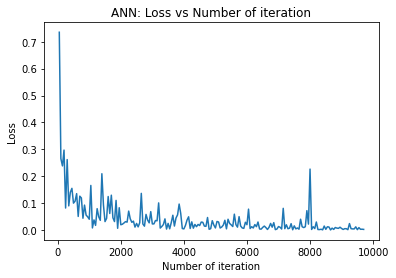

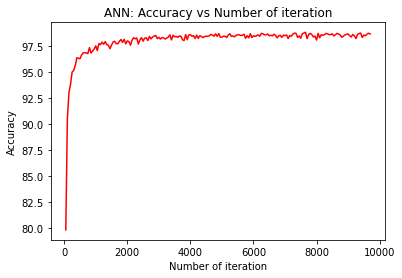

In [46]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

<a id = "6"></a>
### Recurrent Neural Networks

A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes can create a cycle, allowing output from some nodes to affect subsequent input to the same nodes. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs. (Wikipedia)

Recurrent Neural Network vs. Feedforward Neural Network

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_13A-RecurrentNeuralNetworks-WHITEBG.png" height = "500" width = "800">

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_13B-RecurrentNeuralNetworks-WHITEBG.png" height = "500" width = "800">

Source: [https://www.ibm.com/cloud/learn/recurrent-neural-networks]

In [48]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable